In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import display 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
#import visuals as vs
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load the dataset
in_file = 'sentiment_tweets3.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

d_shape = full_data.shape
print(d_shape)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


(10314, 3)


In [21]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10314 entries, 0 to 10313
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Index                      10314 non-null  int64 
 1   message to examine         10314 non-null  object
 2   label (depression result)  10314 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 241.9+ KB


In [23]:
full_data['message to examine'][9288]

'Dear ladies with crippling depression, have you tried smiling? A random man stopped me to tell me so it must be the solution <Emoji: Smiling face with smiling eyes>'

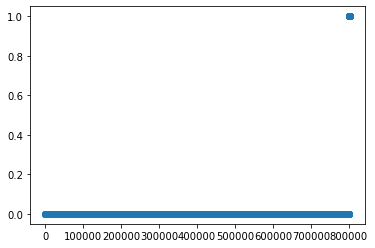

In [28]:
plt.scatter(full_data['Index'],full_data['label (depression result)'])

In [34]:
print(f'{full_data.shape} is the shape of the data')
print(f'Description: \n{full_data.describe()}')

(10314, 3) is the shape of the data
Description: 
               Index  label (depression result)
count   10314.000000               10314.000000
mean   491253.470525                   0.224355
std    261688.134407                   0.417177
min       106.000000                   0.000000
25%    263019.250000                   0.000000
50%    514988.000000                   0.000000
75%    773521.500000                   0.000000
max    802313.000000                   1.000000


<AxesSubplot:>

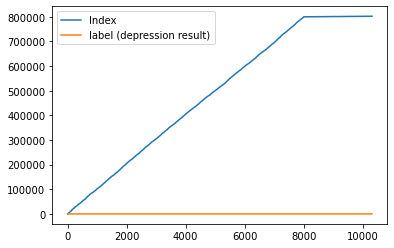

In [50]:
full_data.plot()

<AxesSubplot:xlabel='label (depression result)'>

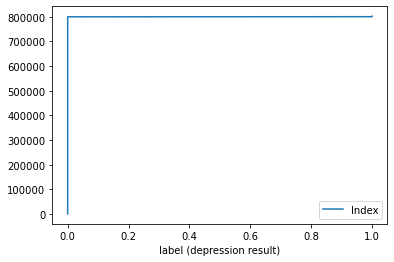

In [59]:
full_data.plot('label (depression result)')

In [66]:
full_data.head(8000)

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
7995,799410,"&quot;Wow, What A Tight Fit&quot; Lmao, Shutup.",0
7996,799680,@theokk don't know what you could possibly mea...,0
7997,799746,"@shwood loved the cameo, made me chuckle! alon...",0
7998,799826,lol. i just realized my room has a color theme...,0


In [70]:
for i in full_data['message to examine']:
  for j in i.split():
    if j.isdigit():
      s = "yes"
    else:
      s = "no"
print(s)

yes


In [71]:
full_data

,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0
...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1
10310,802310,What do you do when depression succumbs the br...,1
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1
10312,802312,dont mistake a bad day with depression! everyo...,1


In [79]:
import re
def remove_numbers(text):
  return ' '.join([i for i in str(text).split() if not i.isdigit()])

full_data['clean_tweets'] = full_data['message to examine'].apply(lambda x: remove_numbers(x))


In [80]:
full_data

,Index,message to examine,label (depression result),clean_tweets
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...


In [81]:
def remove_weblinks(text):
  return re.sub(r"http\S+", "", text)

full_data['clean_tweets2'] = full_data['clean_tweets'].apply(lambda x: remove_weblinks(x))

In [82]:
full_data

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...


In [83]:
def remove_twitter(text):
  return re.sub('@[\w]+','',text)

full_data['clean_tweets3'] = full_data['clean_tweets2'].apply(lambda x: remove_twitter(x))

In [84]:
full_data

,Index,message to examine,label (depression result),clean_tweets,clean_tweets2,clean_tweets3
0,106,just had a real good moment. i missssssssss hi...,0,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...,just had a real good moment. i missssssssss hi...
1,217,is reading manga http://plurk.com/p/mzp1e,0,is reading manga http://plurk.com/p/mzp1e,is reading manga,is reading manga
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0,@comeagainjen http://twitpic.com/2y2lx - http:...,@comeagainjen -,-
3,288,@lapcat Need to send 'em to my accountant tomo...,0,@lapcat Need to send 'em to my accountant tomo...,@lapcat Need to send 'em to my accountant tomo...,Need to send 'em to my accountant tomorrow. O...
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder,ADD ME ON MYSPACE!!! myspace.com/LookThunder,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...,...,...,...,...,...
10309,802309,No Depression by G Herbo is my mood from now o...,1,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...,No Depression by G Herbo is my mood from now o...
10310,802310,What do you do when depression succumbs the br...,1,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...,What do you do when depression succumbs the br...
10311,802311,Ketamine Nasal Spray Shows Promise Against Dep...,1,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,dont mistake a bad day with depression! everyo...,1,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...,dont mistake a bad day with depression! everyo...


In [85]:
full_data[['Index','label (depression result)','clean_tweets3']]

,Index,label (depression result),clean_tweets3
0,106,0,just had a real good moment. i missssssssss hi...
1,217,0,is reading manga
2,220,0,-
3,288,0,Need to send 'em to my accountant tomorrow. O...
4,540,0,ADD ME ON MYSPACE!!! myspace.com/LookThunder
...,...,...,...
10309,802309,1,No Depression by G Herbo is my mood from now o...
10310,802310,1,What do you do when depression succumbs the br...
10311,802311,1,Ketamine Nasal Spray Shows Promise Against Dep...
10312,802312,1,dont mistake a bad day with depression! everyo...
